# Diabetes Risk Prediction using Machine Learning

## Introduction and Context

### Problem Statement
Diabetes is a prevalent and growing health issue worldwide, with the number of individuals diagnosed continuing to rise each year. While the exact cause of diabetes remains largely unknown, it is widely believed that a combination of genetic and environmental factors, including lifestyle choices, plays a significant role in its development.

Diabetes can lead to serious secondary health complications such as heart disease, nerve damage, and kidney failure. Therefore, early detection of diabetes is crucial, as it allows for timely interventions to manage the condition and prevent further health issues. Although diabetes cannot be cured, it can be managed effectively with the right treatment and medication.

### Project Context
This project focuses on using machine learning techniques to predict whether an individual is at risk of developing diabetes. The dataset used in this analysis includes various medical and demographic features that are commonly associated with diabetes. 

The dataset contains information such as the number of pregnancies, glucose levels, blood pressure, BMI, and family history of diabetes, which are key indicators in determining whether a person is diabetic or not. By analyzing this data, we aim to identify individuals who are at risk of diabetes and provide them with early warnings for proactive health management.

### Motivation
As someone who seen his family member personally experience gestational diabetes, I am motivated to use this project to better understand diabetes, particularly its impact on women. The goal is to utilize machine learning models to identify individuals at risk, enabling early interventions and ultimately improving the management of diabetes.

### Objective
The objective of this project is to build a machine learning model that can predict whether an individual is at risk of diabetes based on the provided features. The model aims to achieve high accuracy in distinguishing between diabetic and non-diabetic individuals, with the goal of providing insights into early diabetes detection.

### Dataset Description
Data set link : https://www.kaggle.com/datasets/saurabh00007/diabetescsv

The dataset used for this analysis includes the following features:
- **Pregnancies**: Number of times pregnant
- **Glucose**: Plasma glucose concentration during a 2-hour oral glucose tolerance test
- **BloodPressure**: Diastolic blood pressure (mm Hg)
- **SkinThickness**: Triceps skinfold thickness (mm)
- **Insulin**: 2-Hour serum insulin concentration (mu U/ml)
- **BMI**: Body mass index, calculated as weight in kg/(height in m)^2
- **Pedigree**: Diabetes pedigree function, a score indicating the likelihood of diabetes based on family history
- **Age**: Age in years
- **Outcome**: Class variable (0 = not diabetic, 1 = diabetic)

## Libraries and Imports
This section imports essential libraries for data analysis, visualization, and model building.

- **Data Manipulation**: `numpy`, `pandas`
- **Visualization**: `matplotlib.pyplot`, `seaborn`
- **Modeling and Evaluation**: `sklearn.model_selection` for splitting data, `sklearn.ensemble` and `sklearn.tree` for various classifiers, `sklearn.metrics` for model evaluation metrics

In [36]:
# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Library to split data 
from sklearn.model_selection import train_test_split

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Library to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay  # to plot confusion matrix

# Set plot style
plt.style.use('ggplot')

## Data Loading
In this step, we load the dataset into the notebook. This dataset, `diabetes.csv`, contains information related to [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age] for predicting diabetes status.

- We load the dataset and create a copy (`data`) to avoid any modifications to the original data during analysis.
- The initial shape of the dataset (rows and columns) is printed to understand its size.

In [33]:
df=pd.read_csv("diabetes.csv")
# copying data to another varaible to avoid any changes to original data
data=df.copy()
print(f'There are {data.shape[0]} rows and {data.shape[1]} columns') # fstring 

There are 768 rows and 9 columns


## Data Preview
Below, we display the first few rows of the dataset to understand the data structure, feature names, and initial values.

In [39]:
#View the first 5 rows of the dataset.
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [40]:
#View the last 5 rows of the dataset.
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


### Dataset Information and Structure

We use the `data.info()` function to examine the dataset's structure, including:

- **Total Rows and Columns**: The dataset has 768 rows and 9 columns, each representing a medical attribute or outcome.
- **Column Data Types**: The data types are mostly integers, with a few floating-point columns for continuous variables like BMI and the Diabetes Pedigree Function.
- **Missing Values**: All columns contain 768 non-null entries, suggesting there are no missing values.

This initial overview helps us understand the dataset composition, which will inform subsequent data cleaning and preprocessing steps.

In [41]:
#Check datatype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Feature Summary and Missing Values

In this cell, we explore key aspects of our dataset:

- **Feature Names**: The dataset includes the following features: `Pregnancies`, `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin`, `BMI`, `DiabetesPedigreeFunction`, `Age`, and `Outcome`.
- **Missing Values**: No missing values are present in any of the columns, indicating complete data across all features.
- **Unique Values**: We check the number of unique values in each column, which helps us understand the variability of each feature. For example, `Pregnancies` has 17 unique values, while `Insulin` has 186, suggesting varying levels of detail in these attributes.

This summary helps us verify data integrity and understand feature distribution, which will be useful in the next steps for exploratory data analysis.

In [7]:
print ("#"*40,"\n","Features : \n\n", data.columns.tolist()) #get name of columns/features
print ("#"*40,"\nMissing values :\n\n", data.isnull().sum().sort_values(ascending=False))
print ("#"*40,"\nUnique values :  \n\n", data.nunique())  #  count of unique values

######################################## 
 Features : 

 ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
######################################## 
Missing values :

 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
######################################## 
Unique values :  

 Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64


**Observations**
* All variables are integer or float types.
* There are no missing  values in the dataset.
* Outcome is our Target Variable.

### Dataset Summary Statistics

The table below provides summary statistics for each numerical feature in our dataset, including:

- **Count**: The number of non-missing entries per feature.
- **Mean**: Average value, which gives an idea of central tendency.
- **Standard Deviation (std)**: Measures the spread or variability of each feature.
- **Min and Max**: The minimum and maximum values provide the range for each feature.
- **Quartiles (25%, 50%, 75%)**: These percentile values help us understand the data distribution and identify potential outliers.

**Observations**:
- Some features, like `Glucose`, `BloodPressure`, `SkinThickness`, and `Insulin`, have a minimum value of 0, which may not be realistic for these physiological measurements and could indicate missing values encoded as zero.
- `Age` ranges from 21 to 81, while `Pregnancies` has a maximum of 17, showing significant variability in the dataset demographics.

These statistics will guide further steps in data cleaning and preprocessing, as we may need to address potential outliers or missing values.

In [8]:
# Summary of the dataset.
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


### Observations

- **Pregnancies**: On average, women in this dataset have experienced approximately 4 pregnancies, with a maximum of 17, showing considerable variability.
- **Zero Values**: Some features, like `Glucose`, `BloodPressure`, `SkinThickness`, and `Insulin`, have minimum values of 0. These zeros are likely erroneous, as physiological measurements typically don’t reach zero. This warrants further investigation to decide on imputation or other treatment.
- **Potential Outliers**: There is a large difference between the maximum values of features like `SkinThickness`, `Insulin`, and `Age` and their respective 75th percentile values. This suggests the presence of outliers in the data, which we might need to handle during preprocessing.
- **Age**: The average age of women in this dataset is 33 years, while the median age is slightly lower at 29, indicating a right-skewed distribution.

These observations guide us on areas to explore further, especially regarding potential errors and outliers, which could impact model performance if left untreated.

# Exploratory Data Analysis

### Univariate analysis

In this section, we perform a univariate analysis to explore the distribution of a continuous variable. We will visualize the spread, central tendency (mean, median, and mode), dispersion, and any outliers using a combined boxplot and distribution plot.

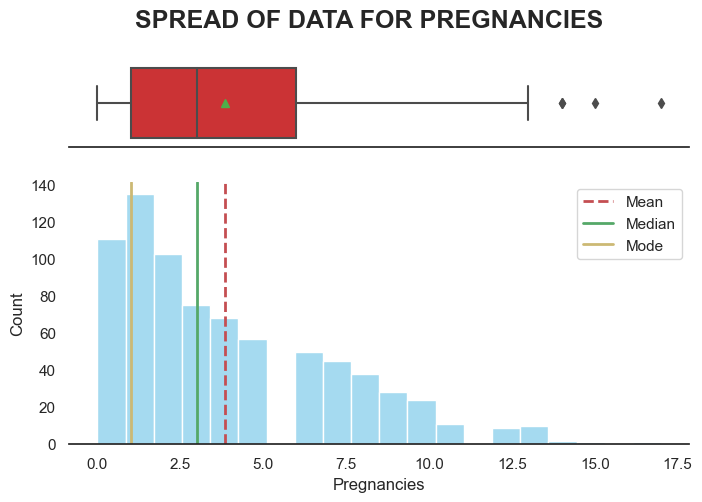

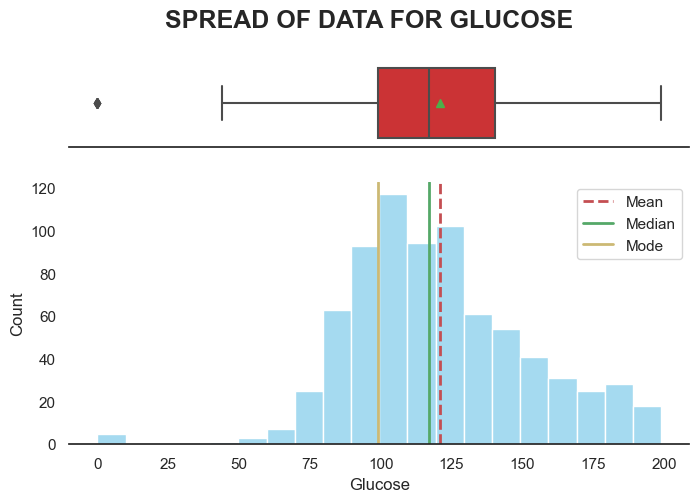

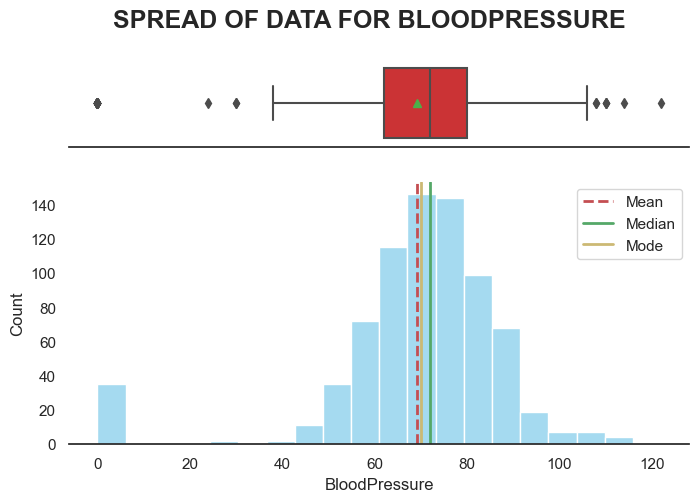

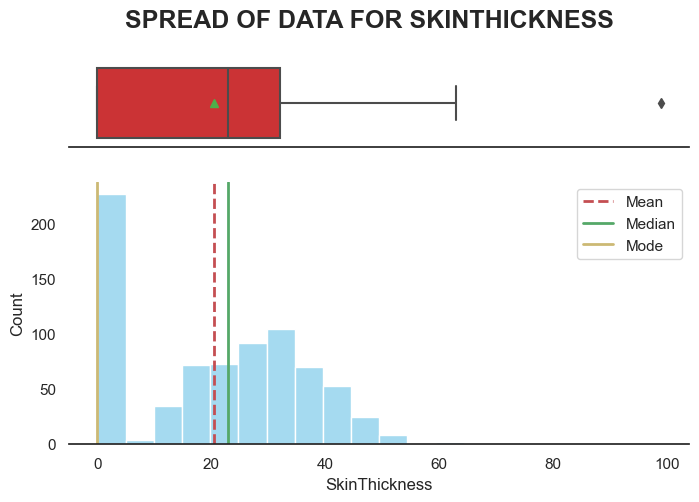

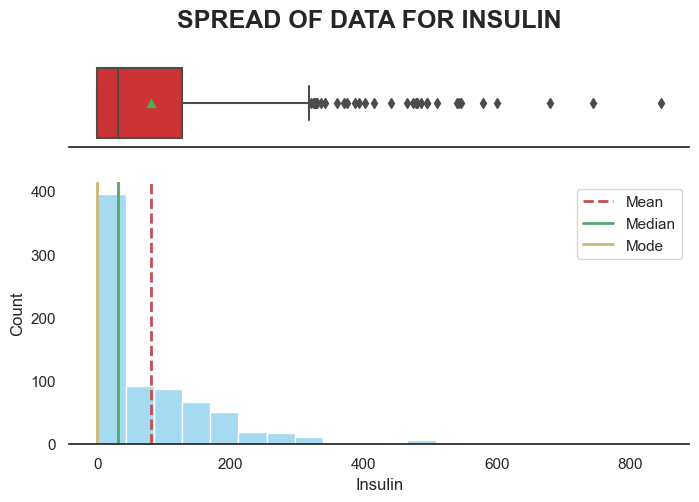

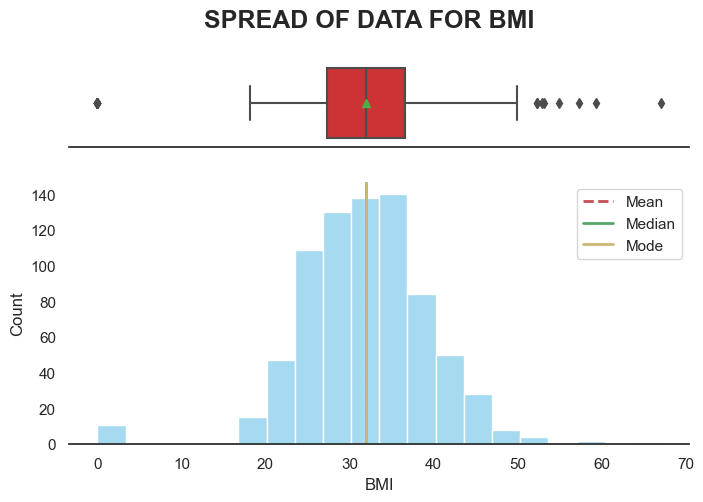

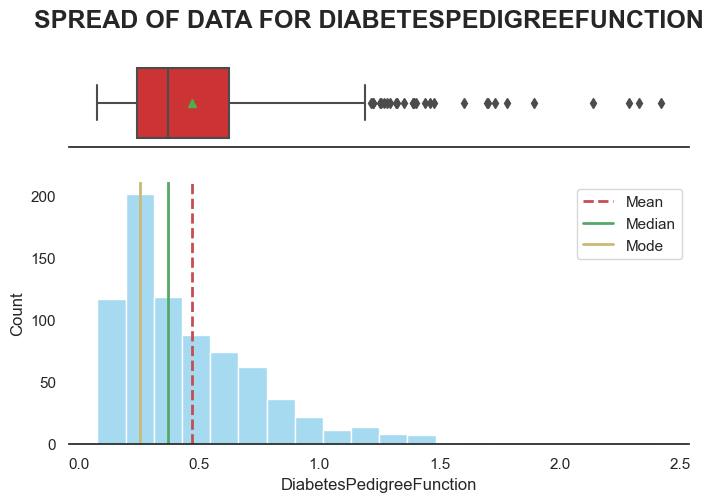

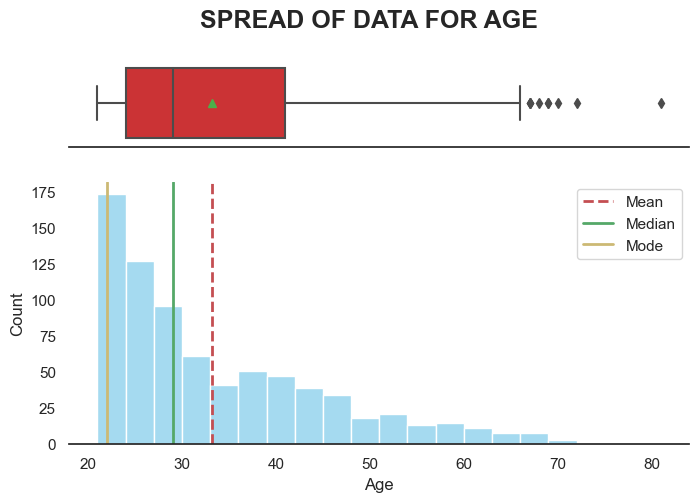

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

def dist_box(data):
    # Function plots a combined graph for univariate analysis of a continuous variable
    # to check spread, central tendency, dispersion, and outliers  
    Name = data.name.upper()
    fig, (ax_box, ax_dis) = plt.subplots(nrows=2, sharex=True, gridspec_kw={"height_ratios": (.25, .75)}, figsize=(8, 5))
    mean = data.mean()
    median = data.median()
    mode = data.mode().tolist()[0]
    
    sns.set_theme(style="white")
    sns.set_palette(sns.color_palette("Set1", 8))
    fig.suptitle("SPREAD OF DATA FOR " + Name, fontsize=18, fontweight='bold')
    
    sns.boxplot(x=data, showmeans=True, orient='h', ax=ax_box)
    ax_box.set(xlabel='')

    # Improve the visualization by setting the background to white
    sns.despine(top=True, right=True, left=True)  # Remove side line from graph
    
    # Use histplot instead of distplot (since distplot is deprecated)
    sns.histplot(data, kde=False, ax=ax_dis, color="skyblue", bins=20)
    
    ax_dis.axvline(mean, color='r', linestyle='--', linewidth=2)
    ax_dis.axvline(median, color='g', linestyle='-', linewidth=2)
    ax_dis.axvline(mode, color='y', linestyle='-', linewidth=2)
    
    plt.legend({'Mean': mean, 'Median': median, 'Mode': mode})
    plt.show()  # Explicitly call show to render the plot

# Assuming `data` is your DataFrame
# Select all numerical columns (excluding 'Outcome' as it's the target variable)
numerical_cols = data.select_dtypes(include='number').columns.to_list()
numerical_cols.remove('Outcome')  # Exclude the target variable

# Apply the dist_box function for each numerical column
for col in numerical_cols:
    dist_box(data[col])  # Plot for each numerical column

### **Observations:**

1. **Pregnancies**:  
   The number of pregnancies is right-skewed. The boxplot indicates a few outliers on the right side, which suggests that a small number of individuals have significantly more pregnancies than the majority of the data.

2. **Glucose**:  
   The distribution of plasma glucose is approximately normal. However, the presence of a 0 value stands out as an outlier. Since 0 is not a possible value for glucose, it should be treated as missing data.

3. **Blood Pressure**:  
   The distribution of blood pressure appears fairly normal, except for a few outliers visible in the boxplot. Notably, there are some observations with a 0 blood pressure value, which is also not possible. These 0 values should be treated as missing data. Most of the women in the dataset have normal blood pressure.

4. **Skin Thickness**:  
   Skin thickness exhibits an extreme value of 99, while many entries have a value of 0. Since 0 is not a valid value for skin thickness, these should be treated as missing data.

5. **Insulin**:  
   The distribution of insulin levels is right-skewed, with some outliers on the higher end. The presence of 0 values is also problematic since 0 is not a valid value for insulin concentration. These 0 values should be treated as missing data. Additionally, about 75% of women have less than 127 µU/ml of insulin concentration, with an average of 80 µU/ml.

6. **BMI**:  
   BMI is normally distributed with a mean and median around 32. However, there are a few outliers in this variable. A 0 BMI value is not possible, so these should be treated as missing data.

7. **Diabetes Pedigree Function**:  
   The diabetes pedigree function is right-skewed, and there are some outliers present in this variable.

8. **Age**:  
   The age distribution is right-skewed, and there are some outliers on the higher end, indicating a few individuals who are significantly older than the rest.

### Observations on Class

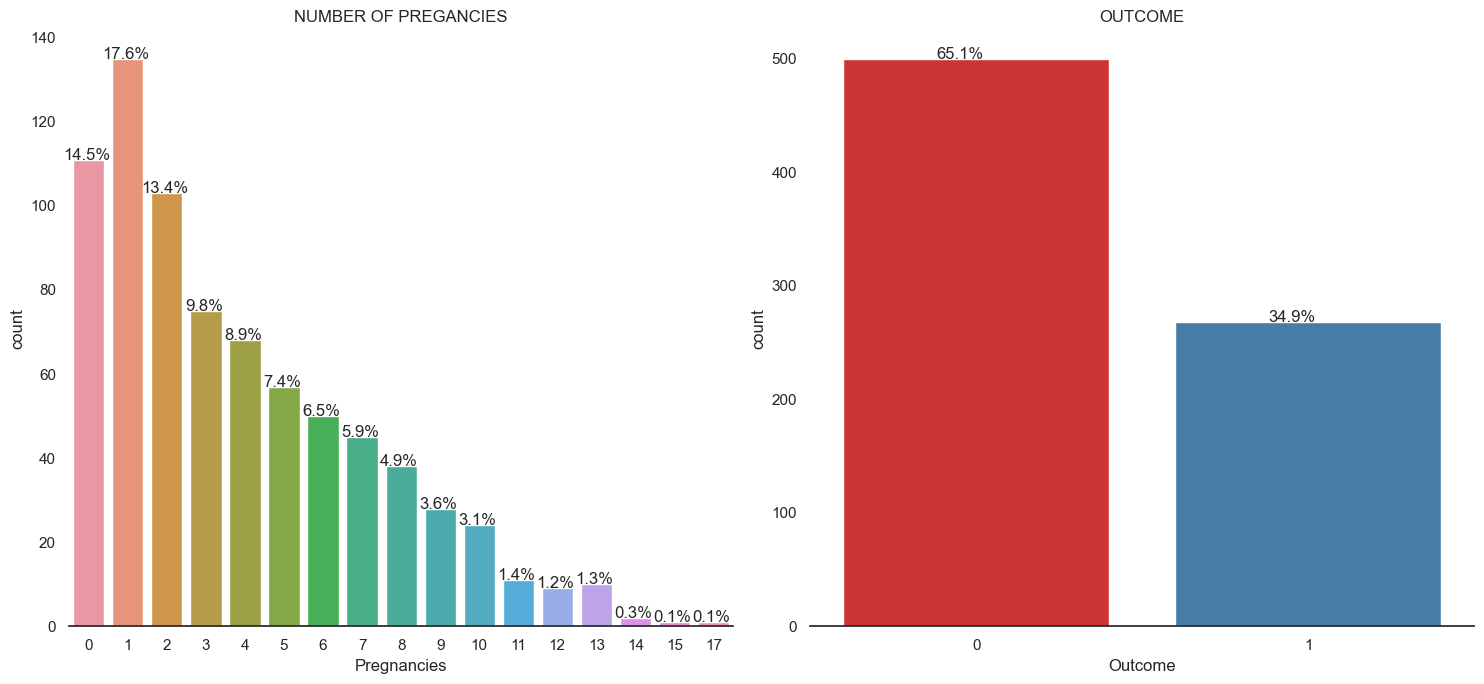

In [11]:
# Making a list of all categorical variables
cat_columns = ['Pregnancies','Outcome']
title=['Number of Pregancies','Outcome']
plt.figure(figsize=(15,7))

sns.set_theme(style="white") # just trying to make visualisation better. This will set background to white
for i, variable in enumerate(cat_columns):
                     plt.subplot(1,2,i+1)
                     order = data[variable].value_counts(ascending=False).index   
                     #sns.set_palette(list_palette[i]) # to set the palette
                     sns.set_palette('Set1')
                     ax=sns.countplot(x=data[variable], data=data )
                     sns.despine(top=True,right=True,left=True) # to remove side line from graph
                     for p in ax.patches:
                           percentage = '{:.1f}%'.format(100 * p.get_height()/len(data[variable]))
                           x = p.get_x() + p.get_width() / 2 - 0.05
                           y = p.get_y() + p.get_height()
                           plt.annotate(percentage, (x, y),ha='center')
                     plt.tight_layout()
                     plt.title(title[i].upper())

**Observations**
* The data is slightly imbalanced as there are only ~35% of the women in data who are diabetic and ~65% of women who are not diabetic.
* The most common number of pregnancies amongst women is 1.
* Surprisingly, there are many observations with more than 10 pregnancies.

### Bivariate Analysis

In this section, we examine the relationships between the variables in the dataset. A correlation matrix is plotted using a heatmap to visualize how different features are correlated with each other. The correlation coefficients range from -1 to 1, where:
- A correlation of 1 indicates a perfect positive correlation.
- A correlation of -1 indicates a perfect negative correlation.
- A correlation of 0 indicates no linear relationship.


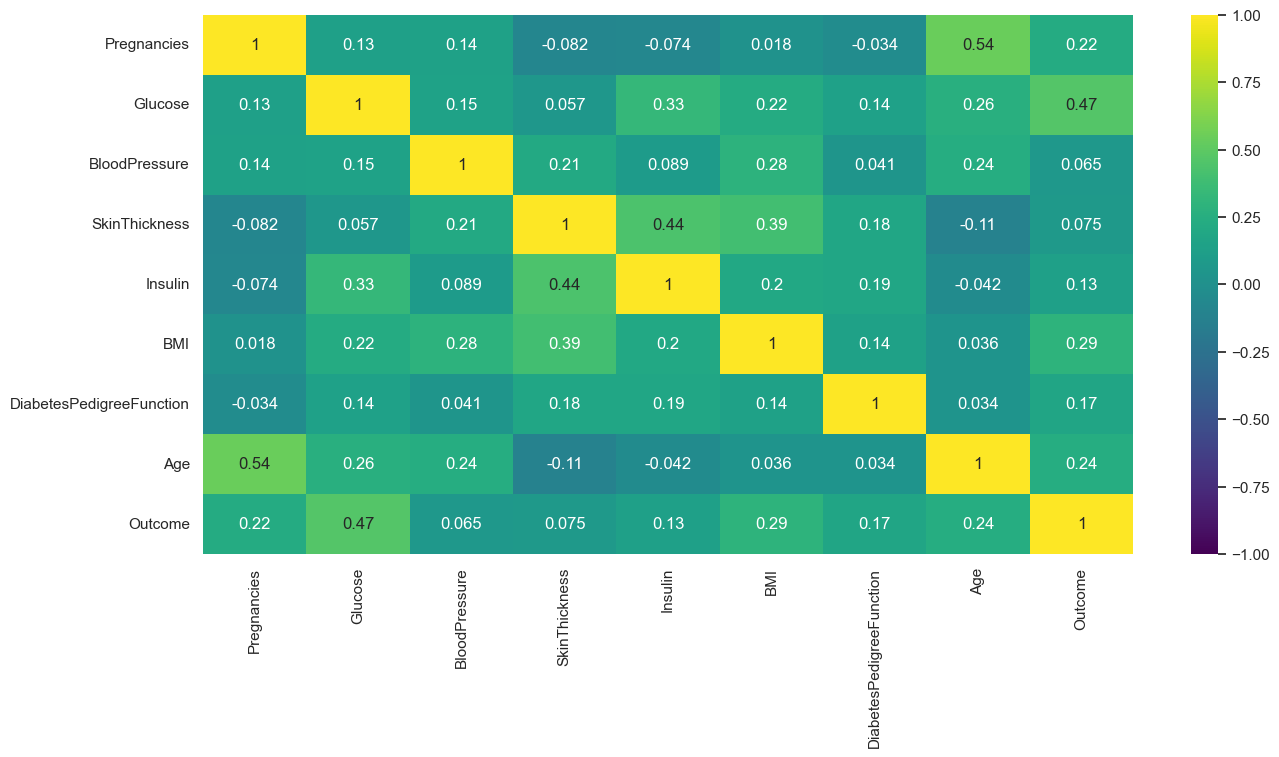

In [12]:
sns.set_palette(sns.color_palette("Set1", 8))
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(),annot=True,vmin=-1,vmax=1,cmap='viridis')
plt.show()

### **Observations from the Correlation Matrix:**

* **Pregnancies and Age**: There is a moderate positive correlation between the number of pregnancies and age.
* **Glucose and BMI**: A positive correlation is observed between glucose levels and BMI, indicating that women with higher BMI tend to have higher glucose levels.
* **Outcome and Glucose/BMI**: The `Outcome` variable, which represents diabetes, shows a positive correlation with both glucose and BMI. This suggests that higher glucose levels and BMI might be associated with a higher likelihood of diabetes.
* **Age and BMI**: There is a weak positive correlation between age and BMI, suggesting that older women tend to have slightly higher BMI values.
* **No strong correlations** between most other variables, which could suggest that they are not highly linearly related.

This correlation matrix helps in identifying potential relationships and multicollinearity, which could be important when building predictive models.

### **Pairwise Relationships**

A pairplot is used to visualize the relationships between all pairs of variables in the dataset. The plot will also highlight the distribution of each variable along the diagonal. In this case, the data points are colored according to the `Outcome` variable, which indicates whether the individual is diabetic (1) or non-diabetic (0). This will help us observe how the features relate to each other and how they differ between the diabetic and non-diabetic groups.

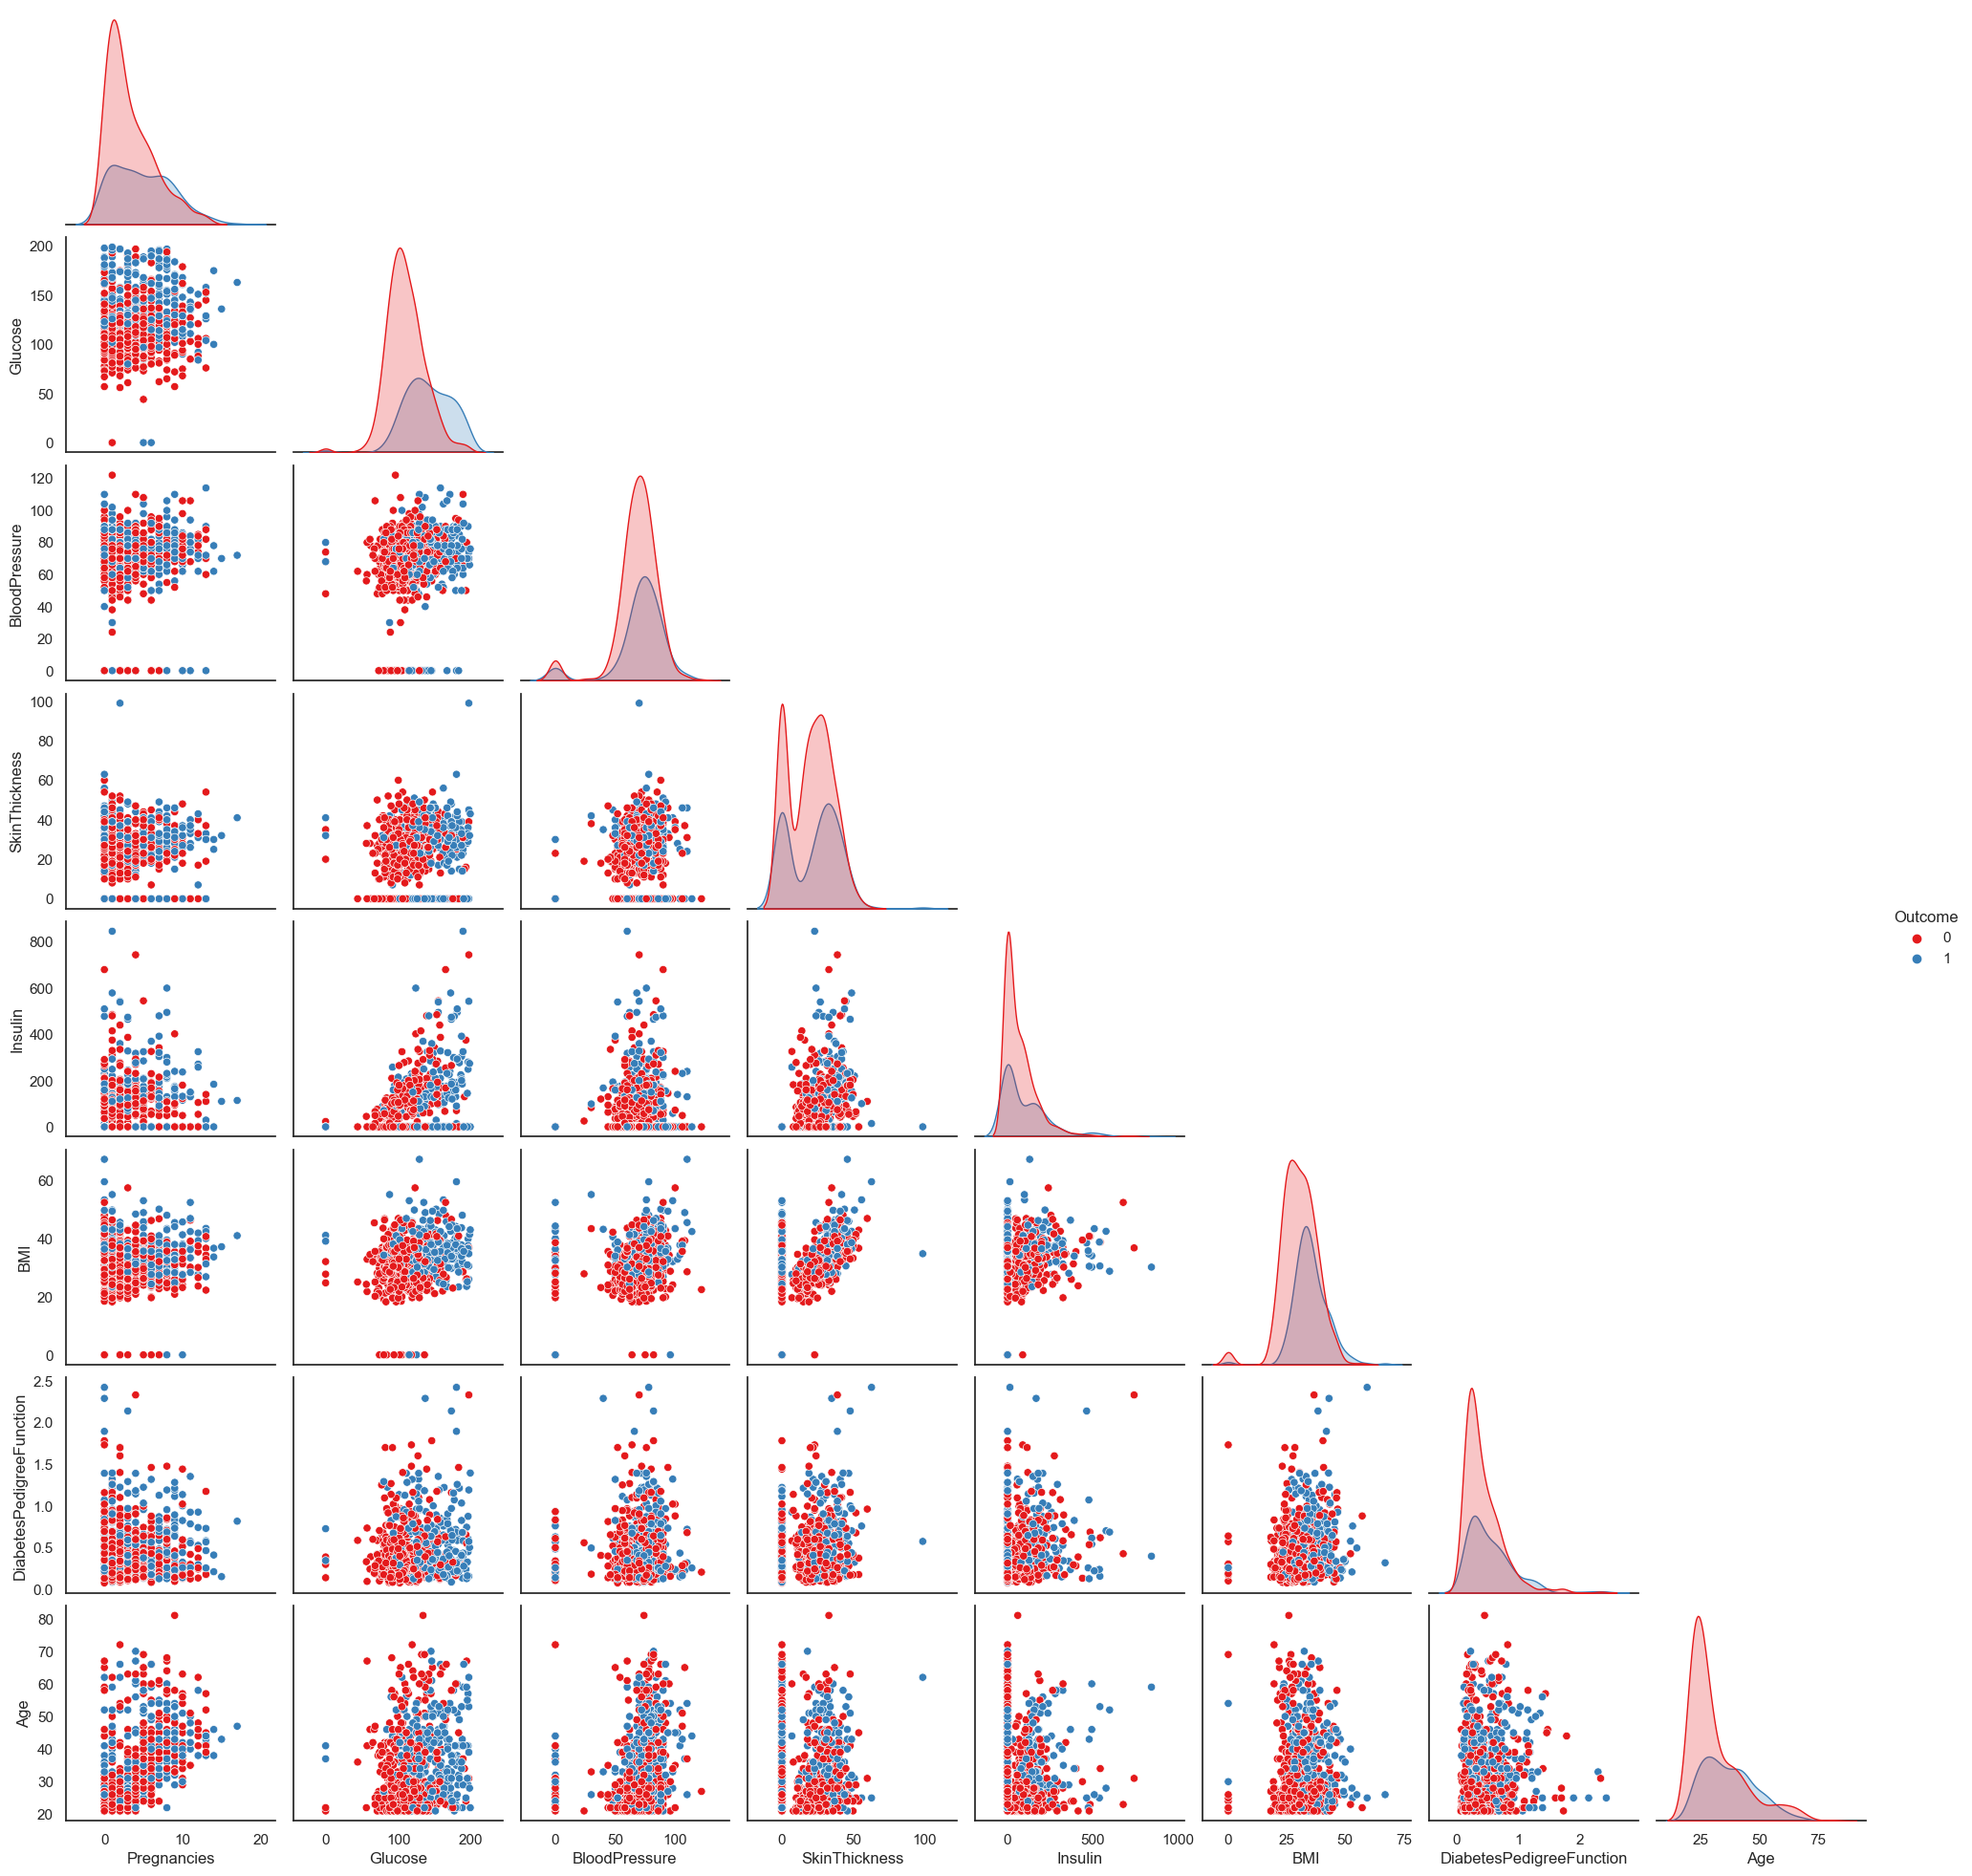

In [13]:
sns.set_palette(sns.color_palette("Set1", 8))
sns.pairplot(data=data,hue="Outcome",corner=True)
plt.show()

**Observations**
* Outcome variable class shows a moderate correlation with 'Glucose'.
* There is a positive correlation between age and number of pregnancies which makes sense.
* Insulin and skin thickness also shows a moderate positive correlation.
* We can see that most non-diabetic persons have glucose concentration<=100 and BMI<30 
* However, there are overlapping distributions for diabetic and non-diabetic persons. We should investigate it further.

In [14]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

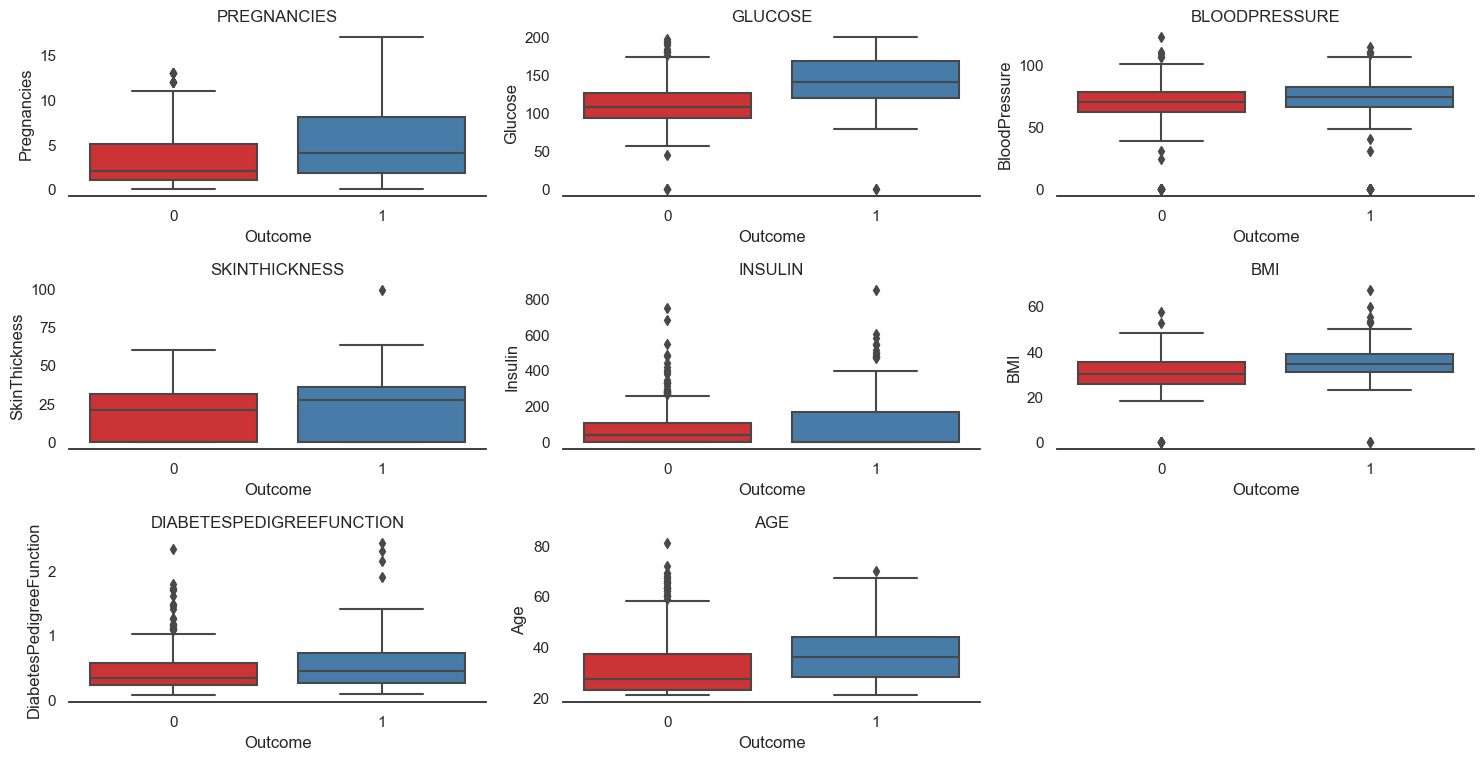

In [15]:
numeric_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age',]
plt.figure(figsize=(15,25))

sns.set_palette(sns.color_palette("Set1", 8))
for i, variable in enumerate(numeric_columns):
        plt.subplot(10,3,i+1)
        
        sns.boxplot(x='Outcome',y= data[variable], data=data)     
        sns.despine(top=True,right=True,left=True) # to remove side line from graph
        plt.tight_layout()
        plt.title(variable.upper())

**Observation**
* There is not much difference between the blood pressure levels of a diabetic and a non-diabetic person.
* There is one outlier with very high skin thickness in diabetic patients
* Skin thickness  doesn't  seem to significant in likelihood of diabetes.

## Insights based on EDA

* Diabetes is more prominent in women with more pregnancies.
* Higher plasma glucose concentration is seen in Women with diabetes. 
* Higher levels of insulin is found in women having diabetes.
* Women  with diabetes have higher BMI.
* Diabetic women have higher diabetes pedigree function value suggesting family history matters.
* Age does play an important role,Diabetes is more prominent in middle age to older aged women.
* Skin thickness doesnt seem to play any significant role in likelihood of diabetes.

### Handling Missing value 
Glucose, Blood pressure, SkinThickness , Insulin ,BMI had  0 values replacing them  by median of the respective variable

In [51]:
# Replacing zero values with the median again
data.loc[data.Glucose == 0, 'Glucose'] = data.Glucose.median()
data.loc[data.BloodPressure == 0, 'BloodPressure'] = data.BloodPressure.median()
data.loc[data.SkinThickness == 0, 'SkinThickness'] = data.SkinThickness.median()
data.loc[data.Insulin == 0, 'Insulin'] = data.Insulin.median()
data.loc[data.BMI == 0, 'BMI'] = data.BMI.median()

### **Observations on Missing Value Handling**

* All zero values in `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin`, and `BMI` columns have been replaced with the median value of each respective column. This ensures the data is now more representative and avoids the potential bias caused by zero values.
* This approach helps to maintain the continuity of the data, especially for models that do not handle missing values well.

In [52]:
# Check for any zero values in the specified columns after replacement
columns_to_check = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for column in columns_to_check:
    zero_count = (data[column] == 0).sum()
    print(f"Zero values in {column}: {zero_count}")

Zero values in Glucose: 0
Zero values in BloodPressure: 0
Zero values in SkinThickness: 0
Zero values in Insulin: 0
Zero values in BMI: 0


## Split Data

In [53]:
X = data.drop('Outcome',axis=1)
y = data['Outcome'] 

In [54]:
# Splitting data into training and test set:
#The Stratify arguments maintains the original distribution of classes in the target variable while splitting the data into train and test sets.**
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)
print(X_train.shape, X_test.shape)

(537, 8) (231, 8)


In [55]:
y.value_counts(1)

Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64

In [56]:
y_test.value_counts(1)

Outcome
0    0.649351
1    0.350649
Name: proportion, dtype: float64

### Feature Scaling Using StandardScaler

In this step, we are applying **Standard Scaling** to the feature columns in the dataset. Standardization is important when the features have different units or scales, as it helps machine learning models perform better. By using the `StandardScaler`, we remove the mean and scale the features to have a standard deviation of 1. This ensures that all features contribute equally to the model, which is particularly beneficial for models sensitive to feature scaling.

We will scale both the training and test data to ensure that the model has a consistent input format.

In [57]:
from sklearn.preprocessing import StandardScaler
# Creating StandardScaler instance
scaler = StandardScaler()

# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled,columns=X_test.columns)


X_train_scaled_df.index=np.arange(len(X_train_scaled_df))
X_test_scaled_df.index=np.arange(len(X_test_scaled_df))
y_train.index=np.arange(len(y_train))
y_test.index=np.arange(len(y_test))

### Scaled Data

After applying the **StandardScaler**, both the training and testing feature sets have been standardized. This means that all the features now have a mean of 0 and a standard deviation of 1. The data is now ready for machine learning algorithms that require scaled inputs.

### Confusion Matrix Function

A **confusion matrix** is a useful tool for evaluating the performance of classification models. It shows how well the model is making predictions for each class (i.e., how many true positives, false positives, true negatives, and false negatives there are). This function `make_confusion_matrix()` takes in the actual and predicted labels, computes the confusion matrix, and displays it as a heatmap.

The matrix labels are represented as:
- **No (0)**: Represents the negative class (non-diabetic)
- **Yes (1)**: Represents the positive class (diabetic)

We will use this function to visually assess how well our classification model performs on the test data.

In [70]:
def make_confusion_matrix(y_actual, y_predict, title):
    fig, ax = plt.subplots(1, 1)
    
    cm = confusion_matrix(y_actual, y_predict, labels=[0, 1])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=["No", "Yes"])
    disp.plot(cmap='Reds', colorbar=True, ax=ax)
    ax.set_title(title)
    plt.tick_params(axis=u'both', which=u'both', length=0)
    plt.grid(b=None, axis='both', which='both', visible=False)
    plt.show()

In [71]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

def get_metrics_score(model, X_train_df, X_test_df, y_train_pass, y_test_pass, flag=True):
    '''
    model : classifier to predict values of X
    '''
    # Defining an empty list to store train and test results
    score_list = [] 
    pred_train = model.predict(X_train_df)
    pred_test = model.predict(X_test_df)
    pred_train = np.round(pred_train)
    pred_test = np.round(pred_test)

    # Calculating various metrics
    train_acc = accuracy_score(y_train_pass, pred_train)
    test_acc = accuracy_score(y_test_pass, pred_test)
    train_recall = recall_score(y_train_pass, pred_train)
    test_recall = recall_score(y_test_pass, pred_test)
    train_precision = precision_score(y_train_pass, pred_train)
    test_precision = precision_score(y_test_pass, pred_test)
    train_f1 = f1_score(y_train_pass, pred_train)
    test_f1 = f1_score(y_test_pass, pred_test)

    # Storing scores in the list
    score_list.extend((train_acc, test_acc, train_recall, test_recall, train_precision, test_precision, train_f1, test_f1))

    # Printing the scores if flag is True
    if flag:
        print("\x1b[0;30;47m \033[1mMODEL PERFORMANCE\x1b[0m")
        print("\x1b[0;30;47m \033[1mAccuracy   : Train:\x1b[0m", round(train_acc, 3),
              "\x1b[0;30;47m \033[1mTest:\x1b[0m ", round(test_acc, 3))
        print("\x1b[0;30;47m \033[1mRecall     : Train:\x1b[0m", round(train_recall, 3),
              "\x1b[0;30;47m \033[1mTest:\x1b[0m", round(test_recall, 3))
        print("\x1b[0;30;47m \033[1mPrecision  : Train:\x1b[0m", round(train_precision, 3),
              "\x1b[0;30;47m \033[1mTest:\x1b[0m ", round(test_precision, 3))
        print("\x1b[0;30;47m \033[1mF1         : Train:\x1b[0m", round(train_f1, 3),
              "\x1b[0;30;47m \033[1mTest:\x1b[0m", round(test_f1, 3))

    return score_list  # Returning the list with train and test scores

In [72]:
# # defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = []
f1_test = []

def add_score_model(score):
     '''Add score to list for comparision'''  
     acc_train.append(score[0])
     acc_test.append(score[1])
     recall_train.append(score[2])
     recall_test.append(score[3])
     precision_train.append(score[4])
     precision_test.append(score[5])
     f1_train.append(score[6])
     f1_test.append(score[7])

# Model building

### Decision Tree

### Decision Tree Classifier Model Evaluation

In this section, we train a Decision Tree Classifier on the scaled training dataset (`X_train_scaled_df`) and evaluate its performance on both the training and test datasets. We use several performance metrics to assess the model's effectiveness:

- **Accuracy**: The proportion of correct predictions made by the model.
- **Precision**: The proportion of positive predictions that are actually correct.
- **Recall**: The proportion of actual positives that are correctly identified.
- **F1 Score**: A balanced measure of precision and recall.

The confusion matrix will also be displayed to visualize the number of true positives, false positives, true negatives, and false negatives for both training and test data.

Training Accuracy: 1.0
Test Accuracy: 0.7272727272727273
Training Precision: 1.0
Test Precision: 0.7225621684220411
Training Recall: 1.0
Test Recall: 0.7272727272727273
Training F1 Score: 1.0
Test F1 Score: 0.7242236380830477


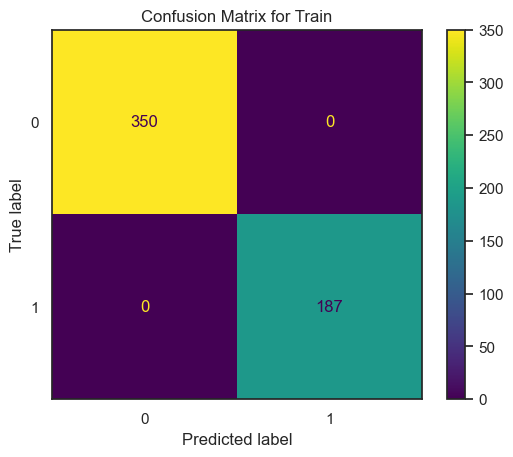

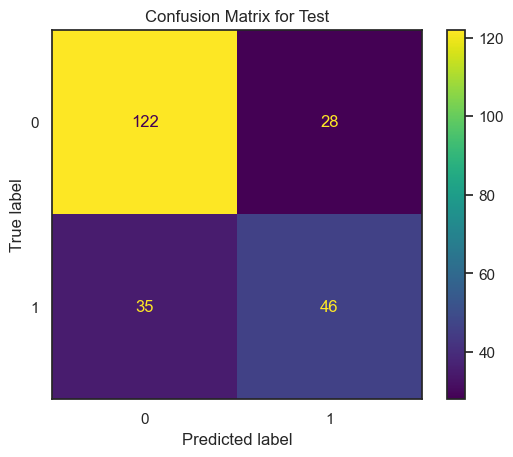

In [81]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Fitting the Decision Tree model
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train_scaled_df, y_train)

# Function to calculate metrics and plot confusion matrix
def get_metrics_score(model, X_train, X_test, y_train, y_test):
    # Making predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Calculate accuracy, precision, recall, and F1 score for train and test data
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred_test)

    precision_train = precision_score(y_train, y_pred_train, average='weighted')
    precision_test = precision_score(y_test, y_pred_test, average='weighted')

    recall_train = recall_score(y_train, y_pred_train, average='weighted')
    recall_test = recall_score(y_test, y_pred_test, average='weighted')

    f1_train = f1_score(y_train, y_pred_train, average='weighted')
    f1_test = f1_score(y_test, y_pred_test, average='weighted')

    # Print and return the metrics
    print(f"Training Accuracy: {accuracy_train}")
    print(f"Test Accuracy: {accuracy_test}")
    print(f"Training Precision: {precision_train}")
    print(f"Test Precision: {precision_test}")
    print(f"Training Recall: {recall_train}")
    print(f"Test Recall: {recall_test}")
    print(f"Training F1 Score: {f1_train}")
    print(f"Test F1 Score: {f1_test}")

    # Confusion matrix plotting
    make_confusion_matrix(y_train, y_pred_train, "Confusion Matrix for Train")
    make_confusion_matrix(y_test, y_pred_test, "Confusion Matrix for Test")

    # Return metrics in a dictionary for further use
    return {
        'accuracy_train': accuracy_train,
        'accuracy_test': accuracy_test,
        'precision_train': precision_train,
        'precision_test': precision_test,
        'recall_train': recall_train,
        'recall_test': recall_test,
        'f1_train': f1_train,
        'f1_test': f1_test
    }

# Function to plot the confusion matrix
def make_confusion_matrix(y_true, y_pred, title):
    ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
    plt.title(title)
    plt.grid(False)  # Turn off the grid
    plt.show()

# Calculating different metrics and plotting confusion matrices
score_list_dt = get_metrics_score(d_tree, X_train_scaled_df, X_test_scaled_df, y_train, y_test)

### Results Analysis
The initial results indicate that the Decision Tree is overfitting the training data, as shown by the disparity between training and test performance. This overfitting is likely due to the model's complexity. We will now proceed with hyperparameter tuning to attempt to fix this issue and improve the accuracy


In [82]:
# Define a function to store model scores
score_log = []  # Initialize a list to store scores

def add_score_model(score_dict):
    # Appends the score dictionary to the global score_log list
    score_log.append(score_dict)
    print("Scores added successfully.")

# Call the function to add scores from the decision tree model
add_score_model(score_list_dt)

# Example output of stored scores
print("Score Log:", score_log)

Scores added successfully.
Score Log: [{'accuracy_train': 1.0, 'accuracy_test': 0.7272727272727273, 'precision_train': 1.0, 'precision_test': 0.7225621684220411, 'recall_train': 1.0, 'recall_test': 0.7272727272727273, 'f1_train': 1.0, 'f1_test': 0.7242236380830477}]


* Decision tree is overfitting the training data as there is huge disparity between training and test scores for all the metrics.
* The test recall is very low i.e. only 72%.

* The test recall has increased significantly after hyperparameter tuning but the  model is still overfitting the training data.
* The confusion matrix shows that the model is able to identify majority of patients who are at risk of diabetes.

### Tuning Decision Tree

Before hyperparameter tuning, the **Decision Tree** model may have overfitted the training data, which resulted in high training accuracy but lower test accuracy. To address this, we perform hyperparameter tuning by setting the following parameters for the **DecisionTreeClassifier**:
- **max_depth=5**: Limits the depth of the tree, preventing it from becoming too complex and overfitting the training data.
- **min_samples_leaf=10**: Ensures that each leaf node has at least 10 samples, promoting generalization and reducing overfitting.

After fitting the model with these hyperparameters, we evaluate it on both the training and test sets using performance metrics such as **accuracy**, **precision**, **recall**, and **F1 score**. Additionally, confusion matrices are plotted to visualize how well the model performs on both datasets.

Training Accuracy: 0.8342644320297952
Test Accuracy: 0.7272727272727273
Training Precision: 0.8397979871138976
Test Precision: 0.7315010570824525
Training Recall: 0.8342644320297952
Test Recall: 0.7272727272727273
Training F1 Score: 0.8359587392115196
Test F1 Score: 0.729044222802469


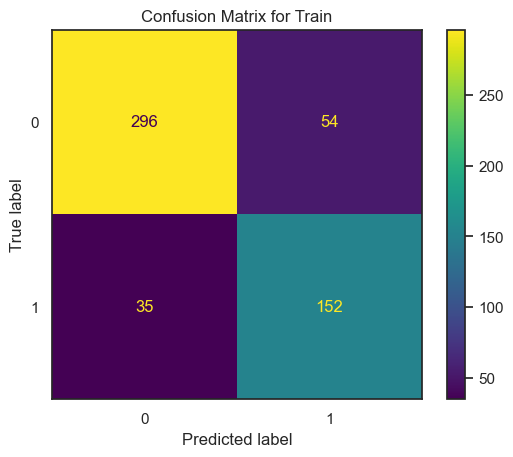

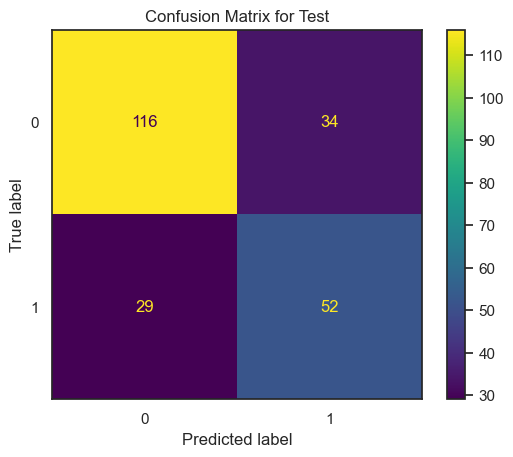

In [85]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Fitting the Decision Tree model with max_depth=5 and min_samples_leaf=10
d_tree = DecisionTreeClassifier(random_state=1, max_depth=5, min_samples_leaf=10)
d_tree.fit(X_train_scaled_df, y_train)

# Function to calculate metrics and plot confusion matrix
def get_metrics_score(model, X_train, X_test, y_train, y_test):
    # Making predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Calculate accuracy, precision, recall, and F1 score for train and test data
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred_test)

    precision_train = precision_score(y_train, y_pred_train, average='weighted')
    precision_test = precision_score(y_test, y_pred_test, average='weighted')

    recall_train = recall_score(y_train, y_pred_train, average='weighted')
    recall_test = recall_score(y_test, y_pred_test, average='weighted')

    f1_train = f1_score(y_train, y_pred_train, average='weighted')
    f1_test = f1_score(y_test, y_pred_test, average='weighted')

    # Print and return the metrics
    print(f"Training Accuracy: {accuracy_train}")
    print(f"Test Accuracy: {accuracy_test}")
    print(f"Training Precision: {precision_train}")
    print(f"Test Precision: {precision_test}")
    print(f"Training Recall: {recall_train}")
    print(f"Test Recall: {recall_test}")
    print(f"Training F1 Score: {f1_train}")
    print(f"Test F1 Score: {f1_test}")

    # Confusion matrix plotting
    make_confusion_matrix(y_train, y_pred_train, "Confusion Matrix for Train")
    make_confusion_matrix(y_test, y_pred_test, "Confusion Matrix for Test")

    # Return metrics in a dictionary for further use
    return {
        'accuracy_train': accuracy_train,
        'accuracy_test': accuracy_test,
        'precision_train': precision_train,
        'precision_test': precision_test,
        'recall_train': recall_train,
        'recall_test': recall_test,
        'f1_train': f1_train,
        'f1_test': f1_test
    }

# Function to plot the confusion matrix
def make_confusion_matrix(y_true, y_pred, title):
    ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
    plt.title(title)
    plt.grid(False)  # Turn off the grid
    plt.show()

# Calculating different metrics and plotting confusion matrices
score_list_dt = get_metrics_score(d_tree, X_train_scaled_df, X_test_scaled_df, y_train, y_test)

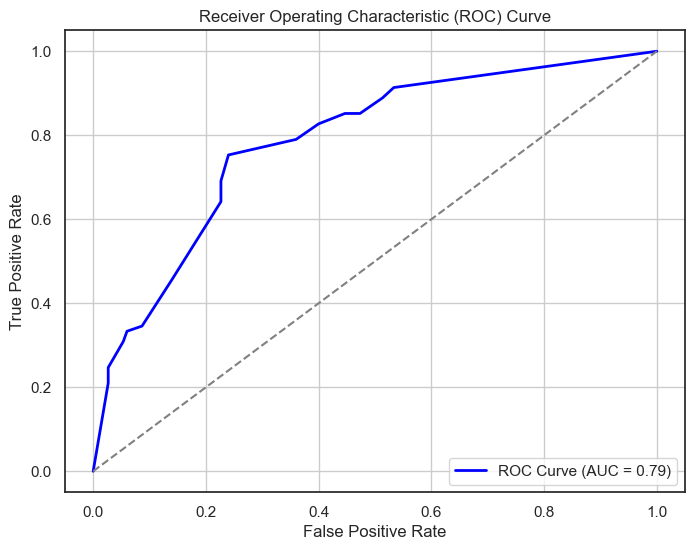

In [87]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Function to plot the ROC Curve
def plot_roc_curve(model, X_test, y_test):
    # Get predicted probabilities
    y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class (1)

    # Compute ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

# Plot the ROC curve after model training
plot_roc_curve(d_tree, X_test_scaled_df, y_test)

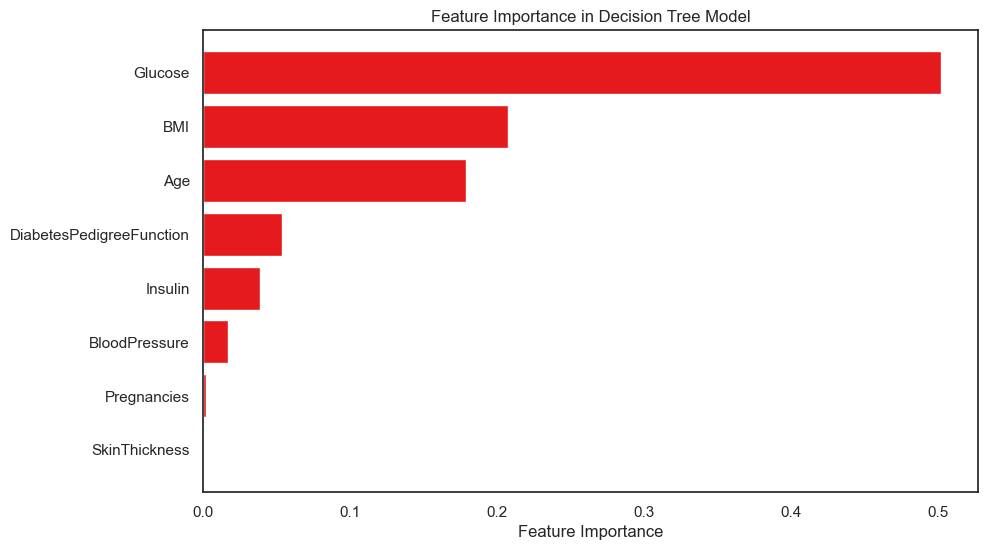

In [89]:
import matplotlib.pyplot as plt
import numpy as np

# Plot feature importance from the fitted Decision Tree model
feature_importance = d_tree.feature_importances_  # Use 'd_tree' instead of 'best_model'
features = X_train_scaled_df.columns  # Ensure 'X_train_scaled_df' has columns attribute

# Sort the feature importance
indices = np.argsort(feature_importance)

plt.figure(figsize=(10, 6))
plt.barh(features[indices], feature_importance[indices], align='center')
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Decision Tree Model')
plt.show()

### Results After Hyperparameter Tuning

After applying the hyperparameters (`max_depth=5` and `min_samples_leaf=10`), the model's performance shows significant improvements over the initial overfitting scenario:

- **Training Accuracy**: 0.834 (83.43%)
- **Test Accuracy**: 0.727 (72.73%)
- **Training Precision**: 0.840
- **Test Precision**: 0.732
- **Training Recall**: 0.834
- **Test Recall**: 0.727
- **Training F1 Score**: 0.836
- **Test F1 Score**: 0.729

These results indicate that the model has learned to generalize better to unseen data, with a noticeable reduction in overfitting. The test performance has improved and stabilized compared to the initial overfitting scenario where the model showed perfect training scores but poor test results

Conclusion and Next Steps

### Summary
The key findings from this analysis show that **Glucose**, **Age**, and **BMI** are the most important factors in identifying individuals at risk of diabetes. Among these, glucose levels play a significant role, followed by age and BMI. However, other variables did not show a significant impact on predicting diabetes risk.

Identifying diabetes risk at an early stage, particularly among pregnant women, can help in better managing the condition and preventing subsequent health complications. The Decision Tree model provided some useful insights into the patterns of diabetes risk based on the data.

Based on the Decision Tree results, we can categorize women into two profiles:
- **Lower Risk Women**: Glucose level ≤ 127, Age ≤ 28.
- **Higher Risk Women**: Glucose level > 100, Age > 28 or BMI > 28.5.

However, the model struggles with correctly identifying cases where **Age** or **BMI** is a more prominent factor than **Glucose**. This suggests that these features should be given equal importance in the model to improve prediction accuracy.

### Limitations and Improvements
Some limitations were encountered during this analysis:
- **Misclassification in Specific Cases**: The model failed to identify some high-risk individuals where age or BMI were more critical factors than glucose levels.
- **Feature Imbalance**: Certain features may require further preprocessing, or perhaps additional features could be created to better represent the relationship between these factors and diabetes risk.
- **Model Limitations**: The Decision Tree model, while effective in some cases, could benefit from using other algorithms or additional hyperparameter tuning to improve its performance, particularly in terms of recall.

For future improvements:
- Consider using more advanced models such as **Random Forest**, **Gradient Boosting Machines**, or **Ensemble methods** to boost accuracy and recall.
- Further **feature engineering** may help to capture more complex relationships between variables.
- Additional **hyperparameter tuning** could potentially improve model performance and address any limitations identified during the analysis.

### Next Steps
Moving forward, the following actions are suggested:
- **Experiment with Other Algorithms**: Investigating other machine learning algorithms, such as **Logistic Regression**, **Support Vector Machines**, or **Neural Networks**, may improve accuracy and provide more insights into the data.
- **Fine-tune Hyperparameters**: By conducting a more extensive search for optimal hyperparameters, we can improve model performance, especially in terms of recall.
- **Expand the Dataset**: More data, including information from a diverse population, may lead to better generalization and improved prediction accuracy.
- **Feature Engineering**: Investigate additional transformations or interactions between features, which could provide better insights into the factors influencing diabetes risk.

### Recommendation
Based on the patient's profile, the following recommendations can help reduce the risk of diabetes:
- **Middle-aged to older women**: These individuals have a higher risk of diabetes. It's crucial to monitor and manage glucose levels regularly, along with adopting healthy lifestyle changes.
- **Overweight women**: They also face a higher risk of diabetes. Regular exercise, maintaining a healthy diet, and keeping glucose levels in check are key preventive measures.